# <span style="color:Red">Análisis de componentes principales</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
plt.style.use('dark_background')

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'] = breast_dataset['label'].replace(0, 'Benign')
breast_dataset['label'] = breast_dataset['label'].replace(1, 'Malignant')
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [5]:
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)
print(f"media: {x.mean()}, desviación: {x.std()}")

media: -6.826538293184326e-17, desviación: 1.0


In [6]:
Mcov = np.cov(x, rowvar=False)

In [7]:
eig_vals, eig_vecs = np.linalg.eig(Mcov)
indices = eig_vals.argsort()[::-1]
eig_vals, eig_vecs = eig_vals[indices], eig_vecs[:, indices]

In [8]:
eig_vecs[0]

array([ 0.21890244, -0.23385713, -0.00853124,  0.04140896, -0.03778635,
        0.01874079,  0.12408834,  0.0074523 , -0.22310976,  0.09548644,
        0.04147149,  0.05106746,  0.01196721, -0.05950613,  0.05111877,
       -0.15058388,  0.20292425,  0.14671234, -0.22538466, -0.04969866,
        0.06857001, -0.0729289 ,  0.09855269, -0.18257944,  0.0192265 ,
        0.1294764 , -0.13152667, -0.21119401,  0.21146046, -0.70241409])

In [9]:
eig_vals[0] / eig_vals.sum()

0.4427202560752634

In [10]:
explicabilidad = np.cumsum(eig_vals) / eig_vals.sum()
explicabilidad

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

<BarContainer object of 30 artists>

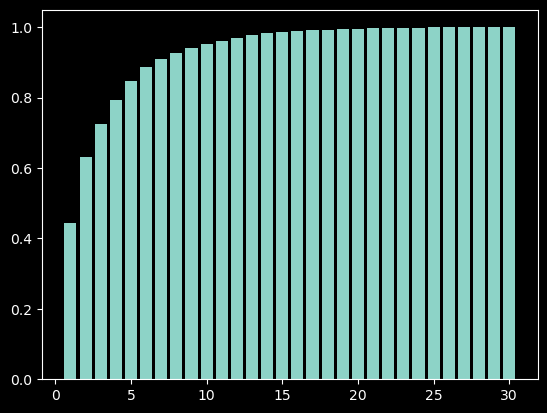

In [11]:
plt.bar(range(1, eig_vals.size + 1), explicabilidad)

In [12]:
pd.DataFrame(
    data    = x.dot(eig_vecs),
    columns = range(1, eig_vecs.shape[1] + 1)
)

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,9.192837,1.948583,-1.123166,3.633731,1.195110,1.411424,-2.159370,0.398407,-0.157118,-0.877402,...,-0.096515,-0.068850,-0.084519,0.175256,-0.151020,0.201503,-0.252585,0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775,0.028656,-0.013358,-0.240988,-0.711905,1.106995,...,0.077327,0.094578,0.217718,-0.011290,-0.170510,0.041129,0.181270,-0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,0.177086,0.541452,0.668166,-0.097374,0.024066,0.454275,...,-0.311067,0.060309,0.074291,-0.102762,0.171158,-0.004735,0.049569,-0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,2.960878,3.053422,-1.429911,-1.059565,-1.405440,-1.116975,...,-0.434193,0.203266,0.124105,-0.153430,0.077496,0.275225,0.183462,-0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,-0.546747,-1.226495,0.936213,-0.636376,-0.263805,0.377704,...,0.116545,0.017650,-0.139454,0.005332,0.003062,-0.039254,0.032168,0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,0.074824,-2.375193,0.596130,0.035471,0.987929,0.256989,...,-0.006888,0.067000,-0.088590,-0.107898,0.219520,0.122900,0.159198,-0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,0.510723,-0.246710,0.716326,1.113360,-0.105207,-0.108632,...,0.009802,-0.019563,0.055405,-0.086135,0.001197,-0.065889,-0.068512,0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,-1.809991,-0.534447,0.192758,-0.341887,0.393917,0.520877,...,0.036592,-0.063352,0.200312,0.044819,0.002429,-0.007095,-0.023691,0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,0.033742,0.567936,-0.223082,0.280239,-0.542035,-0.089296,...,-0.140648,0.042478,-0.168820,0.195969,0.377830,0.198192,-0.027409,0.068086,-0.084163,-0.023783


In [13]:
pd.DataFrame(
    data    = eig_vecs,
    columns = range(1, eig_vecs.shape[1] + 1),
    index = features
)

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
mean radius,0.218902,-0.233857,-0.008531,0.041409,-0.037786,0.018741,0.124088,0.007452,-0.223110,0.095486,...,0.068570,-0.072929,0.098553,-0.182579,0.019226,0.129476,-0.131527,-0.211194,0.211460,-0.702414
mean texture,0.103725,-0.059706,0.064550,-0.603050,0.049469,-0.032179,-0.011400,-0.130675,0.112699,0.240934,...,-0.448369,-0.094801,0.000555,0.098787,-0.084746,0.024557,-0.017357,0.000066,-0.010534,-0.000274
mean perimeter,0.227537,-0.215181,-0.009314,0.041983,-0.037375,0.017308,0.114477,0.018687,-0.223739,0.086386,...,0.069769,-0.075160,0.040245,-0.116649,-0.027015,0.125256,-0.115415,-0.084338,0.383826,0.689897
mean area,0.220995,-0.231077,0.028700,0.053434,-0.010331,-0.001888,0.051653,-0.034674,-0.195586,0.074956,...,0.018443,-0.097566,-0.007777,0.069848,0.210041,-0.362727,0.466612,0.272508,-0.422795,0.032947
mean smoothness,0.142590,0.186113,-0.104292,0.159383,0.365089,-0.286374,0.140669,0.288975,0.006425,-0.069293,...,0.119492,-0.063823,0.020666,0.068697,-0.028955,0.037004,0.069690,-0.001479,-0.003435,0.004847
mean compactness,0.239285,0.151892,-0.074092,0.031795,-0.011704,-0.014131,-0.030918,0.151396,-0.167841,0.012936,...,-0.192621,0.098078,-0.052360,-0.104136,-0.396623,-0.262808,0.097749,0.005463,-0.041017,-0.044674
mean concavity,0.258400,0.060165,0.002734,0.019123,-0.086375,-0.009344,0.107520,0.072827,0.040591,-0.135602,...,-0.005572,0.185212,-0.324870,0.044741,0.096977,0.548876,0.364808,-0.045539,-0.010015,-0.025139
mean concave points,0.260854,-0.034768,-0.025564,0.065336,0.043861,-0.052050,0.150482,0.152322,-0.111971,0.008055,...,0.009424,0.311852,0.051409,0.084028,0.186452,-0.387643,-0.454699,0.008883,-0.004207,0.001077
mean symmetry,0.138167,0.190349,-0.040240,0.067125,0.305941,0.356458,0.093891,0.231531,0.256040,0.572069,...,0.086938,0.018407,0.051201,0.019339,0.024584,0.016044,-0.015165,-0.001433,-0.007570,0.001280
mean fractal dimension,0.064363,0.366575,-0.022574,0.048587,0.044424,-0.119431,-0.295760,0.177121,-0.123741,0.081103,...,0.076272,-0.287869,0.084690,-0.133261,0.207222,0.097405,-0.101245,0.006312,0.007301,0.004756


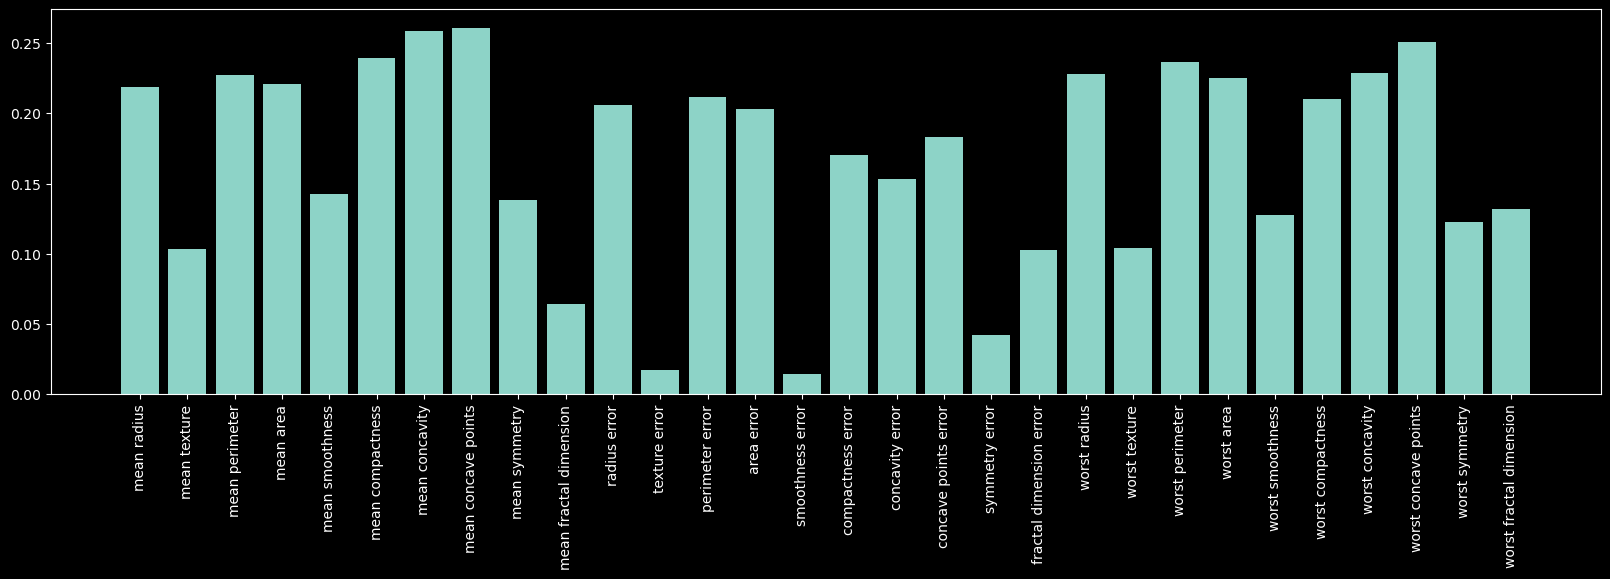

In [14]:
plt.figure(figsize=(20,5))
plt.bar(features, eig_vecs[:, 0])
plt.tick_params(axis='x', rotation=90)

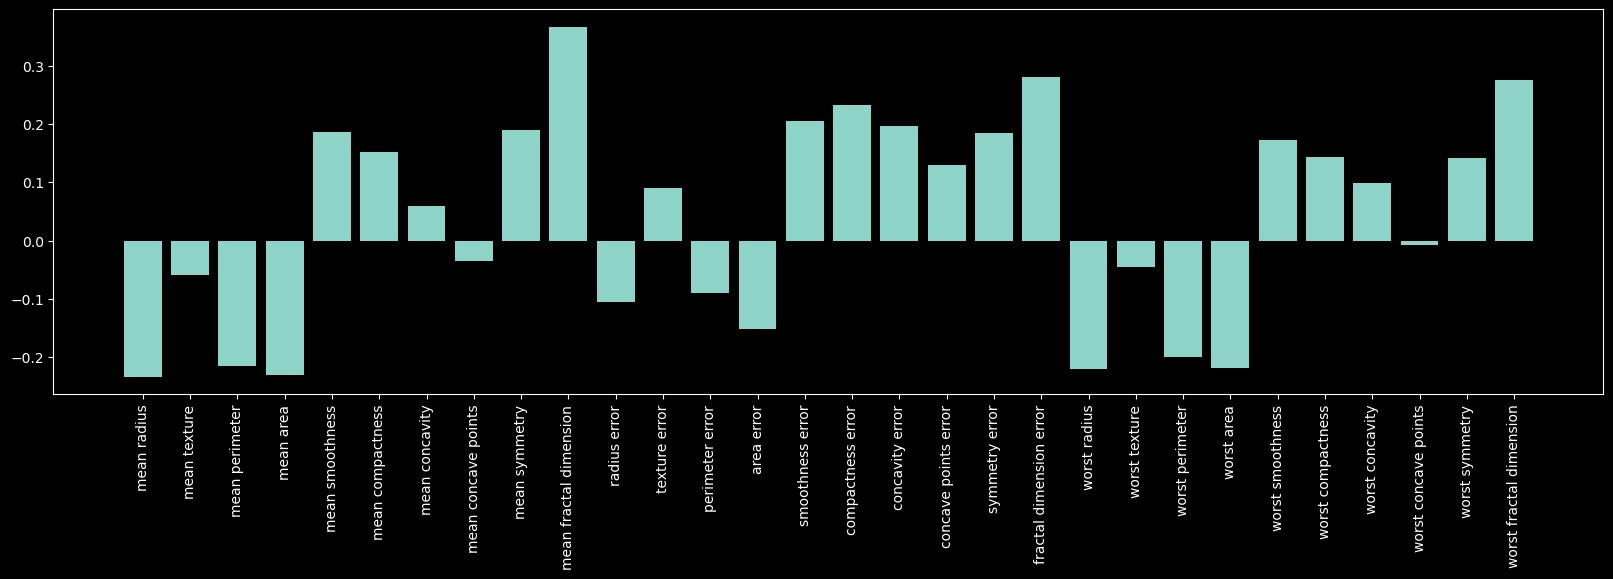

In [15]:
plt.figure(figsize=(20,5))
plt.bar(features, eig_vecs[:, 1])
plt.tick_params(axis='x', rotation=90)

<Figure size 640x480 with 0 Axes>

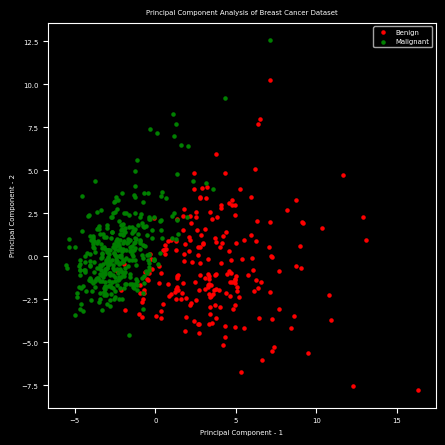

In [16]:
principal_breast_Df = pd.DataFrame(data = x.dot(eig_vecs)[:,0:2]
             , columns = ['principal component 1', 'principal component 2'])
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('Principal Component - 1',fontsize=5)
plt.ylabel('Principal Component - 2',fontsize=5)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=5)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 5)

plt.legend(targets,prop={'size': 5})

In [17]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [18]:
principalComponents_breast

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [19]:
pca_breast.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [20]:
pca_breast.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [22]:
retornos = pd.read_csv('data/retornosYF.csv',index_col=0)
retornos.index.names = ['Date']


retornos.index = pd.to_datetime(retornos.index)

In [23]:
retornos.head()

,AAPL,DIS,MSFT,AMZN,GOOG
Date,,,,,
2016-01-05,-0.025059,-0.020198,0.004562,-0.005024,0.000998
2016-01-06,-0.019570,-0.005352,-0.018165,-0.001799,0.001400
2016-01-07,-0.042205,-0.008569,-0.034783,-0.039058,-0.023170
2016-01-08,0.005288,-0.002512,0.003067,-0.001464,-0.016410
2016-01-11,0.016192,0.006751,-0.000574,0.017610,0.002183


In [24]:
retornos_ff = retornos.copy()

In [25]:
cov = retornos_ff.cov()
cov

,AAPL,DIS,MSFT,AMZN,GOOG
AAPL,0.000326,0.000134,0.000215,0.000214,0.000202
DIS,0.000134,0.000319,0.000135,0.000134,0.000138
MSFT,0.000215,0.000135,0.000290,0.000236,0.000224
AMZN,0.000214,0.000134,0.000236,0.000422,0.000240
GOOG,0.000202,0.000138,0.000224,0.000240,0.000320


In [26]:
eVal, eVec = np.linalg.eig(cov)
indices = eVal.argsort()[::-1]
eVal, eVec = eVal[indices], eVec[:, indices]

In [27]:
eVal

array([1.10282218e-03, 2.31447235e-04, 1.55280502e-04, 1.14262001e-04,
       7.33068549e-05])

In [28]:
eVec

array([[ 0.44614594, -0.03418215, -0.66276025, -0.52745991,  0.2869151 ],
       [ 0.3257626 ,  0.91432069,  0.23097338, -0.06572941,  0.01507811],
       [ 0.4525234 , -0.08392864, -0.19982985,  0.17893812, -0.84630239],
       [ 0.5249939 , -0.38349124,  0.6769266 , -0.3335789 ,  0.08838188],
       [ 0.46307289, -0.0934864 , -0.09611737,  0.75774135,  0.43978777]])

In [29]:
eVal[0]/sum(eVal)

0.6575695165988553

In [30]:
explained_variance = (eVal / np.sum(eVal))
explained_variance

array([0.65756952, 0.13800289, 0.09258766, 0.06812994, 0.04371   ])

In [31]:
explained_variance.cumsum()

array([0.65756952, 0.7955724 , 0.88816006, 0.95629   , 1.        ])

In [32]:
pc1 = retornos_ff.dot(eVec[:,0])
pc1

Date
2016-01-05   -0.017871
2016-01-06   -0.018990
2016-01-07   -0.068596
2016-01-08   -0.005439
2016-01-11    0.019420
                ...   
2024-12-23    0.005735
2024-12-24    0.025795
2024-12-26   -0.005554
2024-12-27   -0.031451
2024-12-30   -0.023069
Length: 2262, dtype: float64

In [33]:
eVec[:,0]

array([0.44614594, 0.3257626 , 0.4525234 , 0.5249939 , 0.46307289])

In [34]:
eVec[:,1]

array([-0.03418215,  0.91432069, -0.08392864, -0.38349124, -0.0934864 ])

In [35]:
eVec[:,2]

array([-0.66276025,  0.23097338, -0.19982985,  0.6769266 , -0.09611737])

In [36]:
eVec[:,3]

array([-0.52745991, -0.06572941,  0.17893812, -0.3335789 ,  0.75774135])

In [37]:
retornos_ff.columns[indices]

Index(['AAPL', 'GOOG', 'AMZN', 'MSFT', 'DIS'], dtype='object')